In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Kernel is working — Pandas version:", pd.__version__)


✅ Kernel is working — Pandas version: 2.3.2


In [2]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
plt.rcParams.update({"figure.figsize": (12, 4), "axes.titlesize": 14})

# Allow importing from src/ folder
sys.path.append("..")  # one level up from notebooks/ to project root

# Paths
RAW = Path("../data/raw")
PROCESSED = Path("../data/processed")
VISUALS = Path("../outputs/visuals")

# Create folders if they don't exist
PROCESSED.mkdir(parents=True, exist_ok=True)
VISUALS.mkdir(parents=True, exist_ok=True)

# Raw file names (edit if your file names differ)
INV_FILE = "Inventory_and_Sales_Dataset.csv"
TX_FILE  = "Retail_Transaction_Dataset.csv"


In [3]:
# Build file paths
inv_path = RAW / INV_FILE
tx_path  = RAW / TX_FILE

# Load inventory
inv = pd.read_csv(inv_path)

# Load transactions with Date parsed
tx = pd.read_csv(
    tx_path,
    parse_dates=["Date"],           # parse Date column as datetime
    infer_datetime_format=True
)

# Peek at the first few rows
display(inv.head(3))
display(tx.head(3))

# Quick shape check
print("Inventory shape:", inv.shape)
print("Transactions shape:", tx.shape)


C:\Users\Vukona-Maritz\AppData\Local\Temp\ipykernel_38600\363099301.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tx = pd.read_csv(


,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,$4.50,8/16/2024,6/29/2024,9/19/2024,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,$20.00,11/1/2024,5/29/2024,5/8/2024,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,$6.00,8/3/2024,6/10/2024,9/22/2024,3296 Walton Court,31,34,Backordered


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,"1000000000,2022-01-21 06:27:29,Stacey Price,""[...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1000000001,2023-03-01 13:01:21,Michelle Carlso...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6.0,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN


Inventory shape: (990, 16)
Transactions shape: (65535, 13)


In [4]:
# --- Inventory dataset info ---
print("📦 Inventory dataset info:")
inv_info = inv.info()
display(inv_info)

# --- Transactions dataset info ---
print("\n🛒 Transactions dataset info:")
tx_info = tx.info()
display(tx_info)

# --- Missing value ratios ---
inv_missing = (
    inv.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame("missing_ratio")
)
tx_missing = (
    tx.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame("missing_ratio")
)

print("\n🔍 Top missing columns in Inventory:")
display(inv_missing.head(10))

print("\n🔍 Top missing columns in Transactions:")
display(tx_missing.head(10))


📦 Inventory dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               990 non-null    object
 1   Product_Name             990 non-null    object
 2   Catagory                 989 non-null    object
 3   Supplier_ID              990 non-null    object
 4   Supplier_Name            990 non-null    object
 5   Stock_Quantity           990 non-null    int64 
 6   Reorder_Level            990 non-null    int64 
 7   Reorder_Quantity         990 non-null    int64 
 8   Unit_Price               990 non-null    object
 9   Date_Received            990 non-null    object
 10  Last_Order_Date          990 non-null    object
 11  Expiration_Date          990 non-null    object
 12  Warehouse_Location       990 non-null    object
 13  Sales_Volume             990 non-null    int64 
 14  Inventory_Turnov

None


🛒 Transactions dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction_ID     65535 non-null  object        
 1   Date               13109 non-null  datetime64[ns]
 2   Customer_Name      13109 non-null  object        
 3   Product            13109 non-null  object        
 4   Total_Items        13109 non-null  float64       
 5   Total_Cost         13109 non-null  float64       
 6   Payment_Method     13109 non-null  object        
 7   City               13109 non-null  object        
 8   Store_Type         13109 non-null  object        
 9   Discount_Applied   13109 non-null  object        
 10  Customer_Category  13109 non-null  object        
 11  Season             13109 non-null  object        
 12  Promotion          8680 non-null   object        
dtypes: datetime64[ns](1), float64(2

None


🔍 Top missing columns in Inventory:


,missing_ratio
Catagory,0.00101
Product_ID,0.00000
Product_Name,0.00000
Supplier_ID,0.00000
Supplier_Name,0.00000
Stock_Quantity,0.00000
Reorder_Level,0.00000
Reorder_Quantity,0.00000
Unit_Price,0.00000
Date_Received,0.00000



🔍 Top missing columns in Transactions:


,missing_ratio
Promotion,0.867552
Product,0.799969
Customer_Name,0.799969
Total_Items,0.799969
Date,0.799969
Store_Type,0.799969
Total_Cost,0.799969
City,0.799969
Payment_Method,0.799969
Customer_Category,0.799969


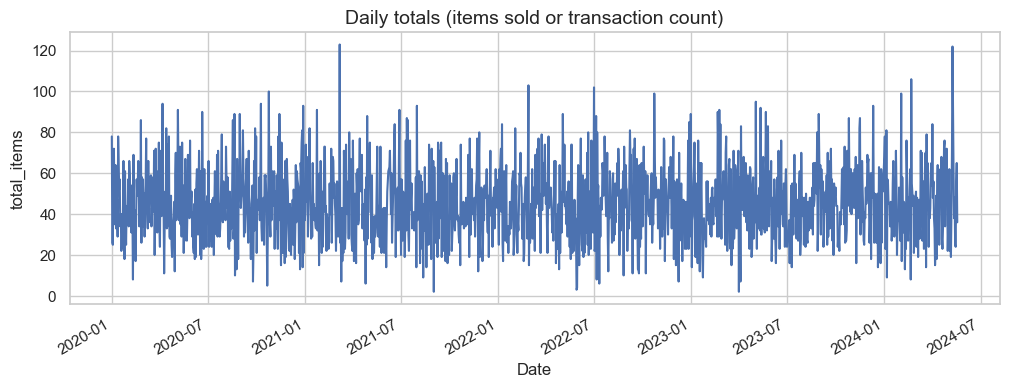

📅 Date range: 2020-01-01 → 2024-05-18
📊 Days with data: 1598


In [5]:
# Choose a proxy for daily activity: Total_Items if present, else transaction count
if "Total_Items" in tx.columns:
    daily_total = (
        tx.groupby(tx["Date"].dt.floor("D"))["Total_Items"]
          .sum()
          .rename("total_items")
    )
else:
    daily_total = (
        tx.groupby(tx["Date"].dt.floor("D"))
          .size()
          .rename("tx_count")
    )

# Plot daily totals
ax = daily_total.plot(title="Daily totals (items sold or transaction count)")
ax.set_xlabel("Date")
ax.set_ylabel(daily_total.name)
plt.show()

# Quick range and coverage check
print("📅 Date range:", daily_total.index.min().date(), "→", daily_total.index.max().date())
print("📊 Days with data:", daily_total.shape[0])


In [6]:
# Create a complete date range from min to max date in your data
all_days = pd.date_range(
    start=daily_total.index.min(),
    end=daily_total.index.max(),
    freq="D"
)

# Dates actually present in your dataset
present_days = pd.DatetimeIndex(daily_total.index)

# Find missing days
missing_days = all_days.difference(present_days)

print(f"📅 Missing calendar days: {len(missing_days)}")
if len(missing_days) > 0:
    if len(missing_days) <= 20:
        print("Missing days list:", missing_days.date.tolist())
    else:
        print("First 10 missing days:", missing_days.date[:10].tolist())


📅 Missing calendar days: 2
Missing days list: [datetime.date(2020, 4, 26), datetime.date(2023, 12, 3)]


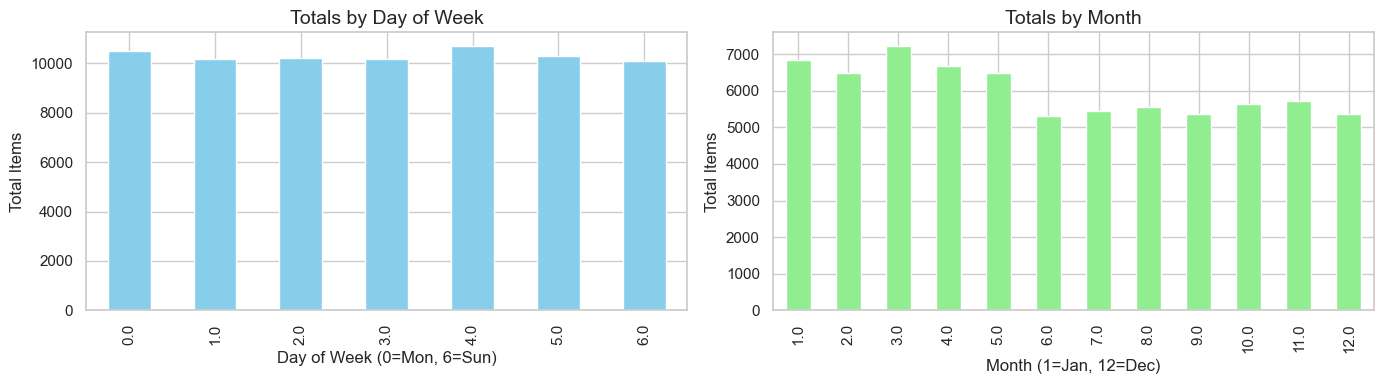

In [7]:
# Extract day of week (0=Monday) and month number
tx["day_of_week"] = tx["Date"].dt.dayofweek
tx["month"] = tx["Date"].dt.month

# Aggregate totals by day of week and month
if "Total_Items" in tx.columns:
    by_dow = tx.groupby("day_of_week")["Total_Items"].sum()
    by_month = tx.groupby("month")["Total_Items"].sum()
else:
    by_dow = tx.groupby("day_of_week").size()
    by_month = tx.groupby("month").size()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

by_dow.plot(kind="bar", ax=axes[0], title="Totals by Day of Week", color="skyblue")
axes[0].set_xlabel("Day of Week (0=Mon, 6=Sun)")
axes[0].set_ylabel("Total Items" if "Total_Items" in tx.columns else "Transaction Count")

by_month.plot(kind="bar", ax=axes[1], title="Totals by Month", color="lightgreen")
axes[1].set_xlabel("Month (1=Jan, 12=Dec)")
axes[1].set_ylabel("Total Items" if "Total_Items" in tx.columns else "Transaction Count")

plt.tight_layout()
plt.show()


🏆 Top 20 products by transaction count:


Product
nan                  52426
['Toothpaste']         332
['Tuna']               195
['Beef']               194
['Shrimp']             185
['Trash Cans']         183
['Cleaning Rags']      181
['Dishware']           181
['Vinegar']            179
['Chicken']            179
['Onions']             178
['Dish Soap']          176
['Garden Hose']        176
['Air Freshener']      176
['Bath Towels']        173
['Orange']             173
['Paper Towels']       172
['Baby Wipes']         171
['Rice']               171
['Dustpan']            170
Name: count, dtype: int64

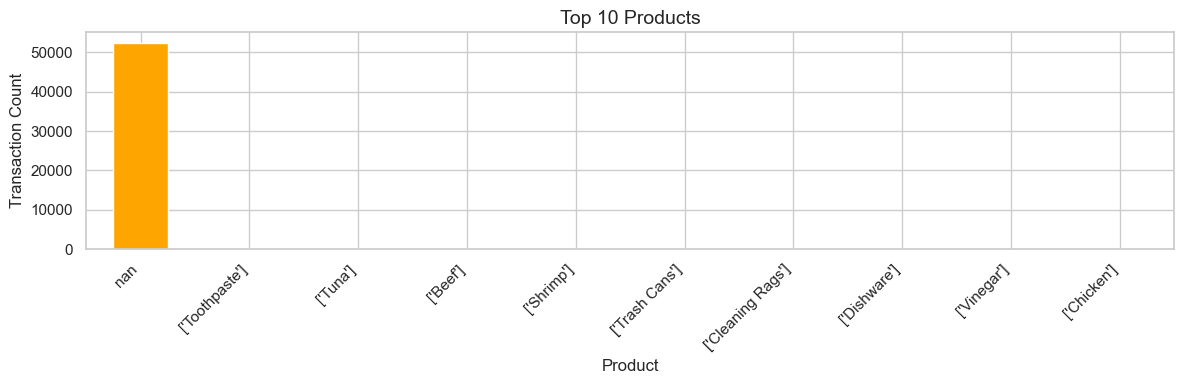

In [8]:
# If 'Product' column exists in transactions, count occurrences
if "Product" in tx.columns:
    prod_counts = tx["Product"].astype(str).value_counts()
    print("🏆 Top 20 products by transaction count:")
    display(prod_counts.head(20))

    # Plot top 10
    prod_counts.head(10).plot(kind="bar", color="orange", title="Top 10 Products")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Transaction Count")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'Product' column found in transactions dataset.")


🚨 Outlier days (>3σ): 6


Date
2021-03-07    123.0
2024-05-09    122.0
2024-02-21    106.0
2022-02-27    103.0
2022-07-01    102.0
2020-10-24    100.0
Name: total_items, dtype: float64

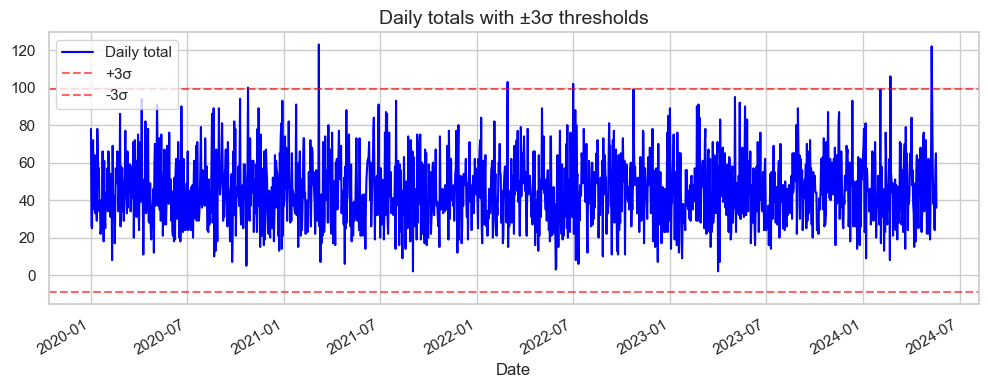

In [9]:
# Convert to float for calculations
s = daily_total.astype(float)

# Calculate z-scores
z = (s - s.mean()) / (s.std() + 1e-6)

# Identify outliers beyond ±3 standard deviations
outliers = s[np.abs(z) > 3]

print(f"🚨 Outlier days (>3σ): {len(outliers)}")
display(outliers.sort_values(ascending=False).head(10))

# Plot daily totals with ±3σ thresholds
plt.figure(figsize=(12, 4))
s.plot(label="Daily total", color="blue")
plt.axhline(s.mean() + 3*s.std(), color="red", linestyle="--", alpha=0.6, label="+3σ")
plt.axhline(s.mean() - 3*s.std(), color="red", linestyle="--", alpha=0.6, label="-3σ")
plt.title("Daily totals with ±3σ thresholds")
plt.legend()
plt.show()


c:\Users\Vukona-Maritz\Desktop\ai_inventory_forecast\notebooks\..\src\data_loader.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce", infer_datetime_format=True)


💾 Processed dataset saved to: C:\Users\Vukona-Maritz\Desktop\ai_inventory_forecast\data\processed\daily_demand_by_product.csv


,Transaction_ID,date,Customer_Name,Product_Item,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,norm_name,demand_qty
0,1000060725,2020-01-13 07:43:27,John Silva,['Air Freshener'],5.0,78.34,Credit Card,New York,Specialty Store,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1000053789,2020-01-16 08:07:17,Katelyn Yoder,['Air Freshener'],3.0,35.63,Mobile Payment,Houston,Supermarket,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1000041286,2020-01-21 00:02:11,Anna Clark,['Air Freshener'],3.0,16.07,Credit Card,New York,Pharmacy,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1000029576,2020-01-28 01:11:20,Jenna Ayers,['Air Freshener'],10.0,14.88,Mobile Payment,Los Angeles,Pharmacy,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1000034814,2020-03-16 16:19:16,Samantha Lewis,['Air Freshener'],8.0,31.85,Debit Card,Chicago,Specialty Store,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


✅ Merged shape: (13109, 30)
📋 Columns: ['Transaction_ID', 'date', 'Customer_Name', 'Product_Item', 'Total_Items', 'Total_Cost', 'Payment_Method', 'City', 'Store_Type', 'Discount_Applied', 'Customer_Category', 'Season', 'Promotion', 'Product_ID', 'Catagory', 'Supplier_ID', 'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Date_Received', 'Last_Order_Date', 'Expiration_Date', 'Warehouse_Location', 'Sales_Volume', 'Inventory_Turnover_Rate', 'Status', 'norm_name', 'demand_qty']


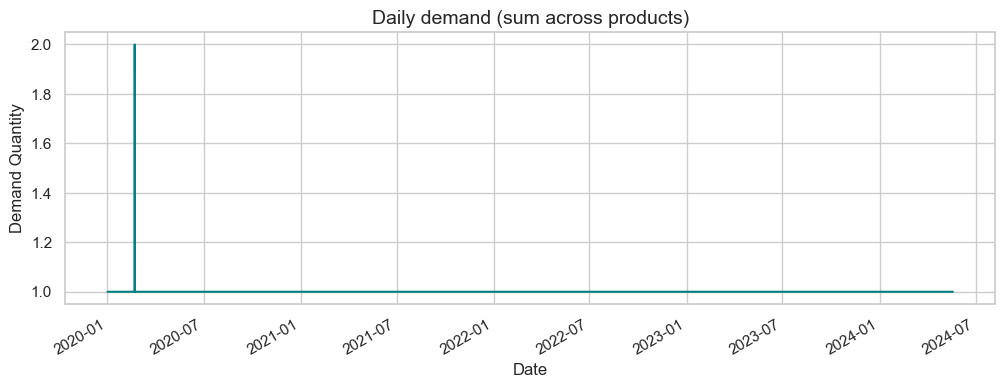

In [10]:
from src.preprocess import prepare_data
import matplotlib.pyplot as plt

# Just pass the filenames — prepare_data() will resolve them from project root
INV_FILE = "Inventory_and_Sales_Dataset.csv"
TX_FILE  = "Retail_Transaction_Dataset.csv"

# Run your preprocessing pipeline
merged = prepare_data(
    inventory_file=INV_FILE,
    transactions_file=TX_FILE
)

# Preview the cleaned, merged dataset
display(merged.head(5))

print("✅ Merged shape:", merged.shape)
print("📋 Columns:", merged.columns.tolist())

# Quick daily demand sum across all products
merged.groupby("date")["demand_qty"].sum().plot(
    title="Daily demand (sum across products)",
    color="teal"
)
plt.xlabel("Date")
plt.ylabel("Demand Quantity")
plt.show()






🏆 Top 10 products by number of daily records:


Product_Item
['Toothpaste']       332
['Tuna']             195
['Beef']             194
['Shrimp']           185
['Trash Cans']       183
['Dishware']         181
['Cleaning Rags']    181
['Chicken']          179
['Vinegar']          179
['Onions']           178
Name: count, dtype: int64


📌 Showing demand history for: ['Toothpaste']


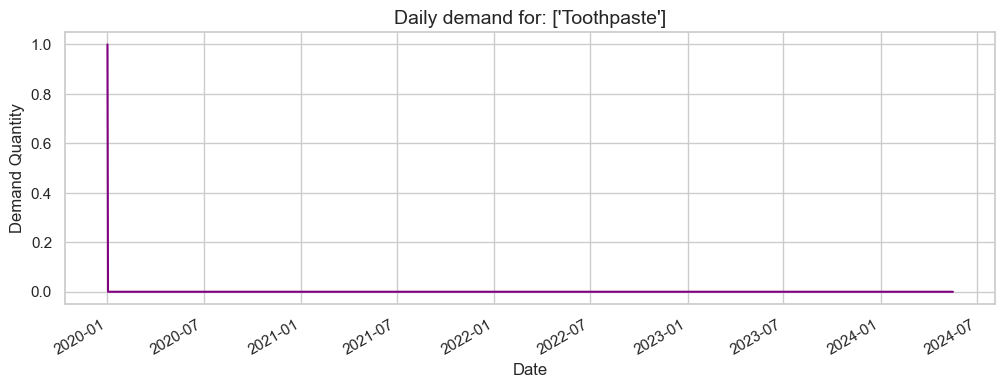

In [11]:
# Find the top 10 most frequent products in the merged dataset
top_items = merged["Product_Item"].value_counts().head(10)
print("🏆 Top 10 products by number of daily records:")
display(top_items)

if len(top_items) > 0:
    # Pick the top product
    item = top_items.index[0]
    print(f"\n📌 Showing demand history for: {item}")

    # Filter for this product and sort by date
    g = merged[merged["Product_Item"] == item].sort_values("date").copy()

    # Reindex to a continuous daily range to show gaps as zeros
    idx = pd.date_range(g["date"].min(), g["date"].max(), freq="D")
    g = g.set_index("date").reindex(idx).rename_axis("date").reset_index()
    g["demand_qty"] = g["demand_qty"].fillna(0)

    # Plot daily demand
    g.set_index("date")["demand_qty"].plot(
        title=f"Daily demand for: {item}",
        color="purple"
    )
    plt.xlabel("Date")
    plt.ylabel("Demand Quantity")
    plt.show()
else:
    print("⚠️ No products found in merged dataset.")


In [12]:
# Group by date and product to ensure one row per product per day
daily_by_product = (
    merged.groupby(["date", "Product_Item"], as_index=False)["demand_qty"]
          .sum()
)

# Save to processed folder
out_csv = PROCESSED / "daily_demand_by_product.csv"
daily_by_product.to_csv(out_csv, index=False)

print(f"💾 Saved clean daily demand dataset to: {out_csv}")
print(f"Rows: {daily_by_product.shape[0]}, Columns: {daily_by_product.shape[1]}")


💾 Saved clean daily demand dataset to: ..\data\processed\daily_demand_by_product.csv
Rows: 13109, Columns: 3


In [13]:
# --- Save daily totals plot ---
ax = daily_total.plot(
    title="Daily totals (items sold or transaction count)",
    color="steelblue"
)
ax.set_xlabel("Date")
ax.set_ylabel(daily_total.name)
fig = ax.get_figure()
fig.savefig(VISUALS / "daily_totals.png", bbox_inches="tight")
plt.close(fig)

# --- Save seasonality charts ---
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

by_dow.plot(kind="bar", ax=axes[0], title="Totals by Day of Week", color="skyblue")
axes[0].set_xlabel("Day of Week (0=Mon, 6=Sun)")
axes[0].set_ylabel("Total Items" if "Total_Items" in tx.columns else "Transaction Count")

by_month.plot(kind="bar", ax=axes[1], title="Totals by Month", color="lightgreen")
axes[1].set_xlabel("Month (1=Jan, 12=Dec)")
axes[1].set_ylabel("Total Items" if "Total_Items" in tx.columns else "Transaction Count")

fig.tight_layout()
fig.savefig(VISUALS / "seasonality_dow_month.png", bbox_inches="tight")
plt.close(fig)

print(f"📊 Visuals saved to: {VISUALS}")


📊 Visuals saved to: ..\outputs\visuals
